# Excercise 1

In the tutorial you saw how to compute LDA for a two class problem. In this excercise we will work on a multi-class problem. We will be working with the famous Iris dataset that has been deposited on the UCI machine learning repository
(https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:
1. Iris-setosa (n=50)
2. Iris-versicolor (n=50)
3. Iris-virginica (n=50)

The four features of the Iris dataset:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

<img src="iris_petal_sepal.png">



In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from statistics import mode
from collections import Counter 
import numpy as np
import seaborn as sns; sns.set();
import pandas as pd
from itertools import combinations 
import math
from sklearn.model_selection import train_test_split
from numpy import pi

### Importing the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

dataset.tail()

,sepal-length,sepal-width,petal-length,petal-width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Data preprocessing

Once dataset is loaded into a pandas data frame object, the first step is to divide dataset into features and corresponding labels and then divide the resultant dataset into training and test sets. The following code divides data into labels and feature set:

In [4]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

The above script assigns the first four columns of the dataset i.e. the feature set to X variable while the values in the fifth column (labels) are assigned to the y variable.

The following code divides data into training and test sets:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train[y_train=='Iris-setosa']=0
y_train[y_train=='Iris-versicolor']=1
y_train[y_train=='Iris-virginica']=2
y_train=np.array(y_train,'int')
y_test[y_test=='Iris-setosa']=0
y_test[y_test=='Iris-versicolor']=1
y_test[y_test=='Iris-virginica']=2
y_test=np.array(y_test,'int')

print(np.unique(y_train))

[0 1 2]


#### Feature Scaling

We will now perform feature scaling as part of data preprocessing too. For this task, we will be using scikit learn `StandardScalar`.

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Write your code below

Write you code below to LDA on the IRIS dataset and compute the overall accuracy of the classifier.

In [7]:
#finding means
mean1=np.zeros((3,4))
final=np.zeros(X_train.shape[1])
flag=[0,0,0]
for i in range(X_train.shape[0]):
    if (y_train[i]==0):
        mean1[0]+=X_train[i]
        flag[0]+=1
    if (y_train[i]==1):
        mean1[1]+=X_train[i]
        flag[1]+=1
    if (y_train[i]==2):
        mean1[2]+=X_train[i]
        flag[2]+=1
    final+=X_train[i]
final=final/np.sum(flag)
mean1[0]/=flag[0]
mean1[1]/=flag[1]
mean1[2]/=flag[2]
print(mean1)
print(final)


[[-1.01586337  0.81196943 -1.32453421 -1.28332359]
 [ 0.00667522 -0.67697955  0.22525676  0.12090146]
 [ 0.8948111  -0.15042192  0.9845985   1.03582423]]
[ 0.00000000e+00 -7.49863135e-16  4.25585493e-16  1.22124533e-16]


In [8]:
#finding sw and sb
sw=np.zeros((4,4))
me=X_train-mean1[y_train]
sw=me.T@me
print(sw)
sb=np.zeros((4,4))
for i in range(3):
    mat=np.array(mean1[i]-final)
    mat=[mat]
    mat=np.array(mat)
    #print(mat.shape)
    #print((mat.T.dot(mat)))
    sb=sb+(flag[i]*np.matmul(mat.T,mat))
print(sb)
eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(sw).dot(sb))
idx = eigvals.argsort()[::-2]
eigvals = eigvals[idx][:2]
w = np.real(np.atleast_1d(eigvecs[:, idx])[:, :2])
print(w,eigvals)

[[44.52097054 30.99078596 13.79582236  7.7224602 ]
 [30.99078596 76.33479439  8.78955077 11.47388844]
 [13.79582236  8.78955077  7.0462481   4.00213667]
 [ 7.7224602  11.47388844  4.00213667  8.02030645]]
[[ 75.47902946 -38.25871753  91.29722578  91.65558497]
 [-38.25871753  43.66520561 -54.10268478 -50.52279974]
 [ 91.29722578 -54.10268478 112.9537519  112.1744104 ]
 [ 91.65558497 -50.52279974 112.1744104  111.97969355]]
[[ 0.18577978  0.68274612]
 [ 0.11909601 -0.08106869]
 [-0.86734704  0.12046705]
 [-0.44610662 -0.71608191]] [3.20713082e+01 1.29920526e-15]


In [9]:
X_train_new=X_train@w
X_test_new=X_test@w
mean11=mean1@w
final_new=final@w
print(final_new)
print(mean11)

[-5.12916592e-16  2.46082829e-17]
[[ 1.62930543e+00 -1.66533454e-15]
 [-3.28696166e-01  4.50334214e-15]
 [-1.16775349e+00 -1.88737914e-15]]


In [10]:
def clas(X):
    return np.argmin([np.sqrt(((X - mean11[i])**2).sum(axis=1)) for i in range(3)], axis=0)
def accuracy(y_pred, y_actual):
    return (y_pred==y_actual).sum()/y_actual.shape[0]*100

In [11]:
train = accuracy( clas(X_train_new), y_train)
test = accuracy( clas(X_test_new), y_test)
print('training accuracy : ',train)
print('training accuracy : ',test)

training accuracy :  98.33333333333333
training accuracy :  100.0


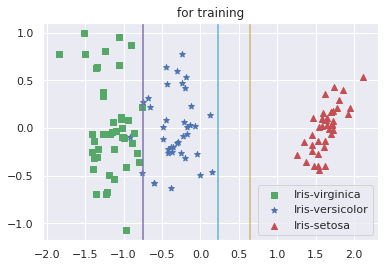

In [12]:
color=['m','c','y']
plt.title('for training')
flag=[0,0,0]
for i in range(X_train_new.shape[0]):
    if(y_train[i]==0):
        if(flag[0]==0):
            plt.scatter(X_train_new[i][0],X_train_new[i][1],color='r',marker='^',label='Iris-setosa')
            flag[0]=1
        if(flag[0]==1):
            plt.scatter(X_train_new[i][0],X_train_new[i][1],color='r',marker='^')
    if(y_train[i]==1):
        if(flag[1]==0):
            flag[1]=1
            plt.scatter(X_train_new[i][0],X_train_new[i][1],color='b',label='Iris-versicolor',marker='*')
        if(flag[1]==1):
            plt.scatter(X_train_new[i][0],X_train_new[i][1],color='b',marker='*')
    if(y_train[i]==2):
        if(flag[2]==0):
            flag[2]=1
            plt.scatter(X_train_new[i][0],X_train_new[i][1],color='g',label='Iris-virginica',marker=',')
        if(flag[2]==1):
            plt.scatter(X_train_new[i][0],X_train_new[i][1],color='g',marker=',')
for i in range(3):
    x1=mean11[(i+1)%3][0]+mean11[(i+2)%3][0]
    plt.axvline(x=x1/2,color=color[i],ymin=-2,ymax=2)
plt.legend()

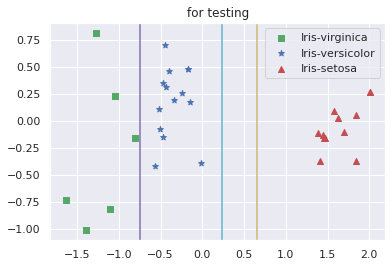

In [13]:
color=['m','c','y']
plt.title('for testing')
flag=[0,0,0]
y_test=clas(X_test_new)
for i in range(X_test_new.shape[0]):
    if(y_test[i]==0 ):
        if(flag[0]==0):
            plt.scatter(X_test_new[i][0],X_test_new[i][1],color='r',label='Iris-setosa',marker='^')
            flag[0]=1
        if(flag[0]==1):
            plt.scatter(X_test_new[i][0],X_test_new[i][1],color='r',marker='^')
    if(y_test[i]==1):
        if(flag[1]==0):
            flag[1]=1
            plt.scatter(X_test_new[i][0],X_test_new[i][1],color='b',label='Iris-versicolor',marker='*')
        if(flag[1]==1):
            plt.scatter(X_test_new[i][0],X_test_new[i][1],color='b',marker='*')
    if(y_test[i]==2):
        if(flag[2]==0):
            flag[2]=1
            plt.scatter(X_test_new[i][0],X_test_new[i][1],color='g',label='Iris-virginica',marker=',')
        if(flag[2]==1):
            plt.scatter(X_test_new[i][0],X_test_new[i][1],color='g',marker=',')
for i in range(3):
    x1=mean11[(i+1)%3][0]+mean11[(i+2)%3][0]
    plt.axvline(x=x1/2,color=color[i],ymin=-2,ymax=2)
plt.legend()

### explanations :
            1. 1st found lda with sw and sb then found the w matrix with 2 eigen vectors (2 because 3 classes (n-1) is preferable sometimes)
            2. now projected all the training and testing into the 2d space
            3. plotted the decission boundary using vertical lines because the slopes are almost infinity and  if plotted correctly it is suppressing the points so plotted by using the decission rule of lda-nearest of the means 
            4. train data is well seperated by boundaries which can be clearly seen only 3 points are out  of  boundaries so accuracies are very higher using ldas
            5. test data is well seperated by boundaries which can be clearly seen no points are outside of the boundaries so accuracies is 100 using lda for this 